<a href="https://colab.research.google.com/github/para662/BSC_DPDM/blob/main/CH5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset

In [1]:
from sklearn.datasets import load_digits #scikkit-learn

# Load the MNIST digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Display the shape of the data and target
print(f"Shap of data: {X.shape}")
print(f"Shap of target: {y.shape}")
print(f"Number of classes: {len(digits.target_names)}")
print(f"First 5 target lebels: {y[:5]}")

Shap of data: (1797, 64)
Shap of target: (1797,)
Number of classes: 10
First 5 target lebels: [0 1 2 3 4]


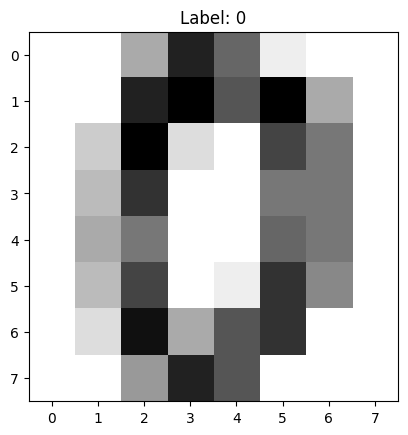

In [2]:
import matplotlib.pyplot as plt

#Get the first image and its target label
first_image = X[0]
first_lebel = y[0]


image_reshaped = first_image.reshape(8, 8)

plt.imshow(image_reshaped, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Label: {first_lebel}")
plt.show()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
import pandas as pd

#Create a DataFrame for the features (pixel data)
df = pd.DataFrame(digits.data)

#Add the target (digit lebel) as a new column
df['target']= digits.target
print("DataFrame created successfully with shape:", df.shape)

df.head()

DataFrame created successfully with shape: (1797, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
X.shape

(1797, 64)

In [6]:
X_train = X[:1700]
y_train = y[:1700]
X_test = X[1700:]
y_test = y[1700:]

#Model Construction
- import
- defind (hyper-paramerters)
- train (fitting)
- evaluate (Test /Train)

#import

In [7]:
from sklearn.tree import DecisionTreeClassifier

#defind (hyper-paramerters)

In [8]:
tree0 = DecisionTreeClassifier(random_state=6)

#Trainning

In [9]:
tree0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=6)

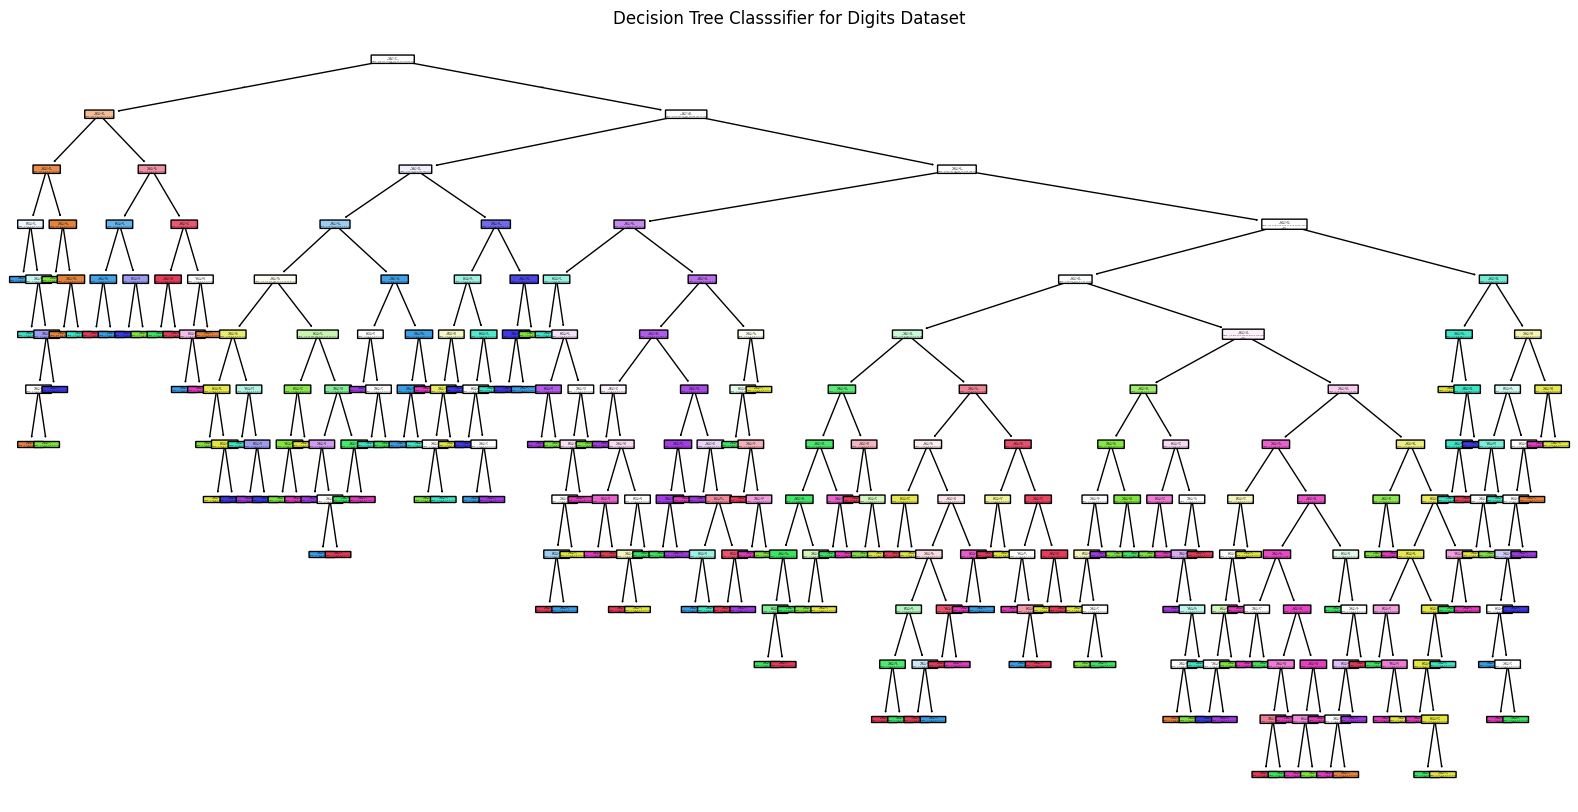

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree0, filled=True, rounded=True, class_names=digits.target_names.astype(str))
plt.title("Decision Tree Classsifier for Digits Dataset")
plt.show()

#Evaluate

In [11]:
y_predict = tree0.predict(X_test)
y_predict

array([8, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 9, 5, 1, 0, 0, 6, 2, 7, 8, 2,
       0, 3, 8, 6, 8, 8, 7, 4, 3, 4, 6, 6, 6, 4, 9, 1, 9, 0, 9, 6, 7, 8,
       2, 0, 0, 6, 7, 6, 8, 2, 1, 7, 4, 6, 3, 1, 2, 9, 1, 7, 6, 8, 4, 8,
       1, 4, 0, 5, 5, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 5, 2, 2, 5, 7, 9, 4,
       4, 3, 3, 4, 9, 0, 8, 9, 8])

In [12]:
y_test

array([5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2,
       0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8,
       2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3,
       1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 8, 8, 4, 9, 0, 8, 9, 8])

In [13]:
import numpy as np

correct_predictions = np.sum(y_predict == y_test)
total_predictions = len(y_test)

print(f"Number of correct predictions: {correct_predictions} out of {total_predictions}")
print(f"Accuracy: {correct_predictions / total_predictions * 100:.2f}%")

Number of correct predictions: 77 out of 97
Accuracy: 79.38%


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, y_predict)

0.7938144329896907

#Pre-pruning (hyper-parameter tuning)

In [16]:
from sklearn.tree import DecisionTreeClassifier #import
tree1 = DecisionTreeClassifier(random_state=6, max_depth=3) #defind
tree1.fit(X_train, y_train) #traning

DecisionTreeClassifier(max_depth=3, random_state=6)

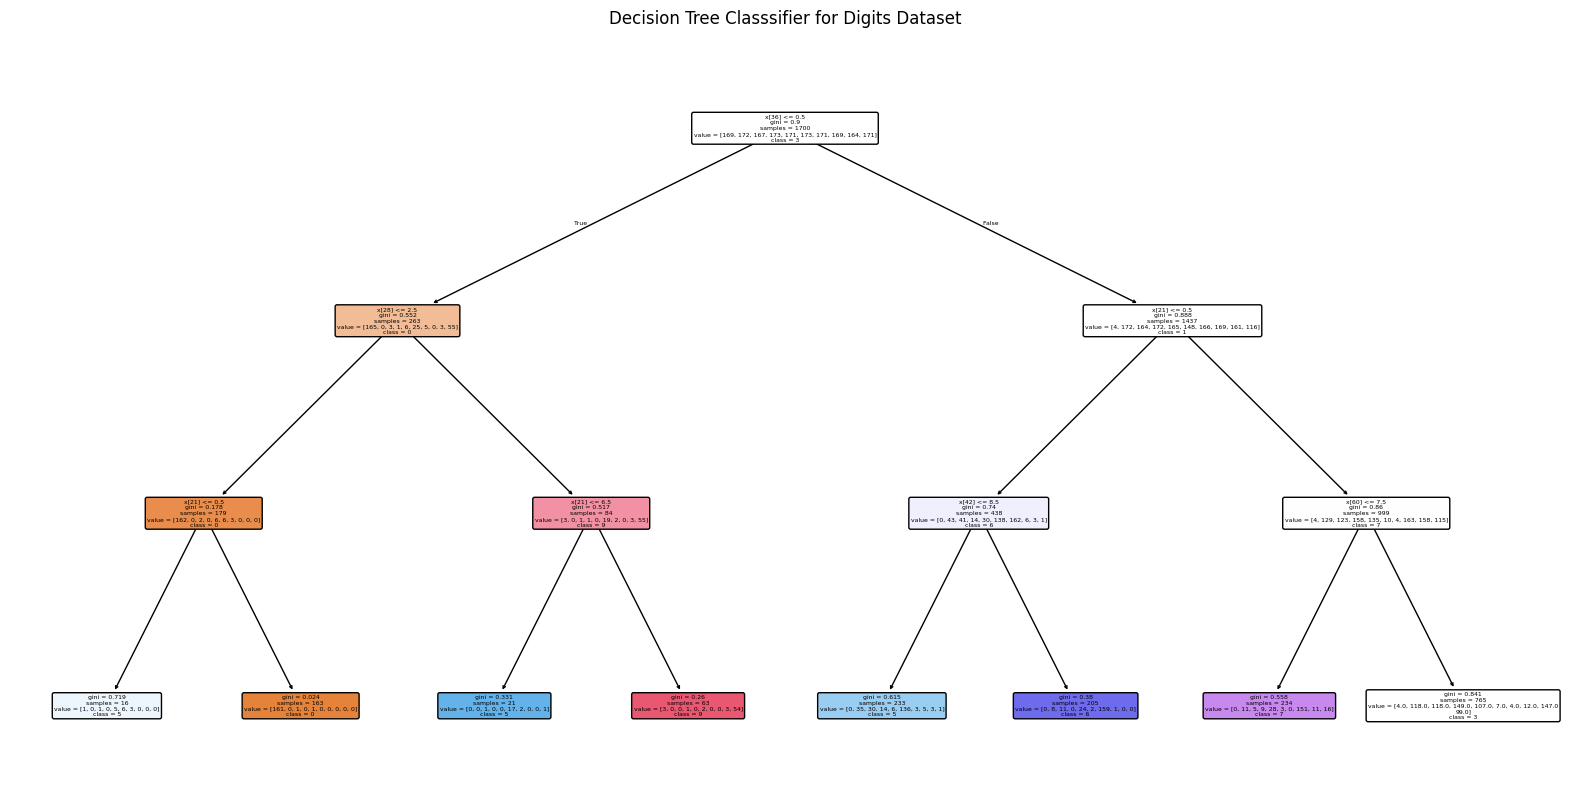

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree1, filled=True, rounded=True, class_names=digits.target_names.astype(str))
plt.title("Decision Tree Classsifier for Digits Dataset")
plt.show()

x[36] ดูpixel ที่ 36 <= 0.5

gini = 0.9 แบ่งได้ดีมาก

sample = 1700 มีข้อมูลเข้า 1700

class = 3 ตัวแรกที่มีค่าเยอะสุด 173 อยู่ตัวที่ 3

##Evaluate

In [18]:
y_predict1 = tree1.predict(X_test)
accuracy_score(y_test, y_predict1)

0.4639175257731959

##Tree2

In [19]:
from sklearn.tree import DecisionTreeClassifier #import
tree2 = DecisionTreeClassifier(random_state=6, max_depth=7) #defind
tree2.fit(X_train, y_train) #traning

y_predict2 = tree2.predict(X_test)
accuracy_score(y_test, y_predict2)

0.7938144329896907

#Quiz11

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree2 = DecisionTreeClassifier(
    random_state=6,
    criterion="entropy",
    max_depth=10,
    min_samples_leaf=3,
    min_samples_split=3,
    max_features=None
)

tree2.fit(X_train, y_train)

y_predict2 = tree2.predict(X_test)

print(accuracy_score(y_test, y_predict2))


0.8865979381443299
